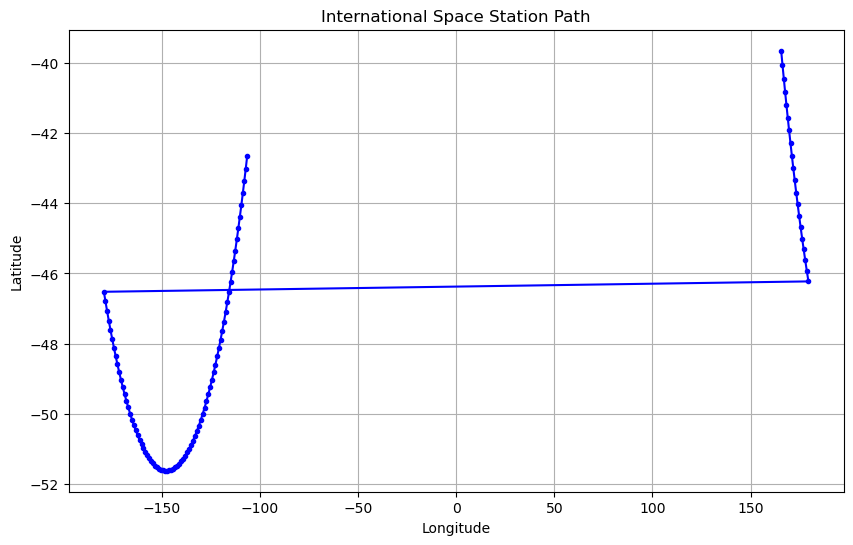

In [2]:
import requests
import matplotlib.pyplot as plt
import time

api_url = "http://api.open-notify.org/iss-now.json"
data_points = 100
time_interval = 10  


def track_iss():
    latitudes, longitudes, timestamps = [], [], []

    for _ in range(data_points):
        response = requests.get(api_url)
        data = response.json()

        latitude = float(data["iss_position"]["latitude"])
        longitude = float(data["iss_position"]["longitude"])
        timestamp = int(data["timestamp"])

        latitudes.append(latitude)
        longitudes.append(longitude)
        timestamps.append(timestamp)

        time.sleep(time_interval)

    return latitudes, longitudes, timestamps


def plot_iss_path(latitudes, longitudes):
    plt.figure(figsize=(10, 6))
    plt.plot(longitudes, latitudes, "b.-")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("International Space Station Path")
    plt.grid(True)
    plt.show()


def main():
    latitudes, longitudes, _ = track_iss()
    plot_iss_path(latitudes, longitudes)


if __name__ == "__main__":
    main()
